In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
from utils import *
from dataset import *
from data_module import *

In [2]:
plt.rcParams['figure.figsize'] = (14,10)
font = {'family' : 'DejaVu Sans',  'weight' : 'normal',  'size'  : 22}
plt.rc('font', **font)

In [3]:
df = pd.read_csv('dataset_strat.csv')

In [4]:
df

,filename,width,height,class,bboxes,total_bolts,fold
0,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[3530, 2445, 3730, 2644]]",1,0
1,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[351, 319, 546, 519]]",1,0
2,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[287, 1023, 486, 1227], [1404, 2490, 1604, 26...",3,0
3,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[272, 1018, 466, 1212], [1399, 2495, 1599, 26...",3,0
4,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[356, 389, 561, 588]]",1,0
...,...,...,...,...,...,...,...
102,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[326, 254, 526, 459], [2522, 269, 2722, 469],...",9,4
103,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[1484, 529, 1684, 723]]",1,4
104,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[336, 324, 536, 524]]",1,4
105,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[466, 469, 671, 663]]",1,4


In [5]:
df["bboxes"] = df["bboxes"].apply(eval)

In [6]:
test_dataset = BoltDataset(df, get_valid_transforms(), 'test')

In [7]:
test_dataset[0]

(tensor([[[1.9407, 1.9407, 1.9407,  ..., 1.8208, 1.8379, 1.8037],
          [1.8893, 1.9235, 1.9235,  ..., 1.7865, 1.8037, 1.7694],
          [1.9064, 1.9235, 1.9235,  ..., 1.8379, 1.8379, 1.8037],
          ...,
          [2.0092, 2.0092, 1.9749,  ..., 1.8379, 1.8208, 1.8208],
          [1.9407, 2.0092, 2.0092,  ..., 1.8037, 1.8208, 1.8379],
          [1.9920, 1.9749, 1.9407,  ..., 1.8208, 1.8208, 1.8037]],
 
         [[2.0259, 2.0434, 2.0434,  ..., 1.9034, 1.9034, 1.9034],
          [2.0259, 2.0434, 2.0434,  ..., 1.8683, 1.9209, 1.8333],
          [2.0259, 2.0084, 2.0259,  ..., 1.8683, 1.9209, 1.8859],
          ...,
          [2.1310, 2.1134, 2.1134,  ..., 1.9559, 1.9559, 1.9209],
          [2.0959, 2.1134, 2.1310,  ..., 1.9034, 1.9384, 1.9209],
          [2.1134, 2.1134, 2.0959,  ..., 1.9384, 1.9384, 1.9034]],
 
         [[2.1694, 2.1520, 2.1868,  ..., 2.0300, 2.0125, 2.0300],
          [2.1520, 2.1694, 2.1520,  ..., 2.0125, 2.0125, 1.9603],
          [2.1520, 2.1520, 2.1694,  ...,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 1024, 1024])


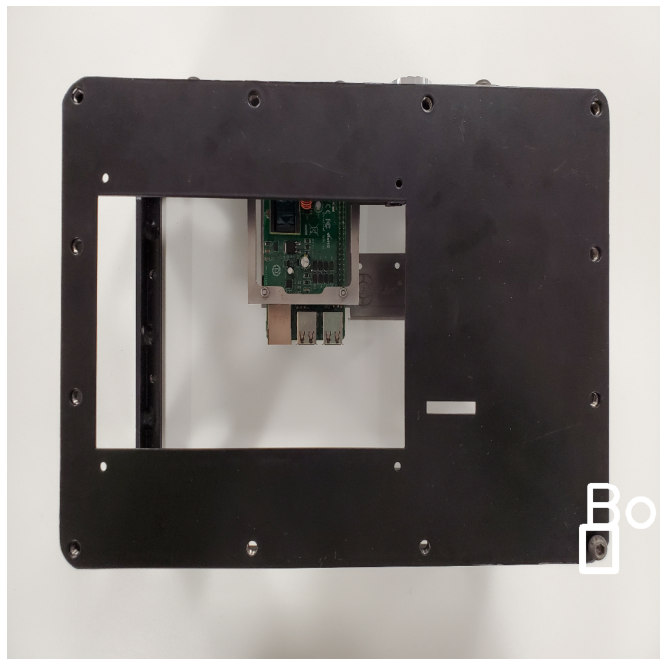

In [8]:
test_dataset.show_data(15)

In [9]:
bolt_module = BoltDataModule(df,
                             get_train_transforms(target_img_size=1024),
                             get_valid_transforms(target_img_size=1024),
                             num_workers=16,
                             bs=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 1024, 1024])


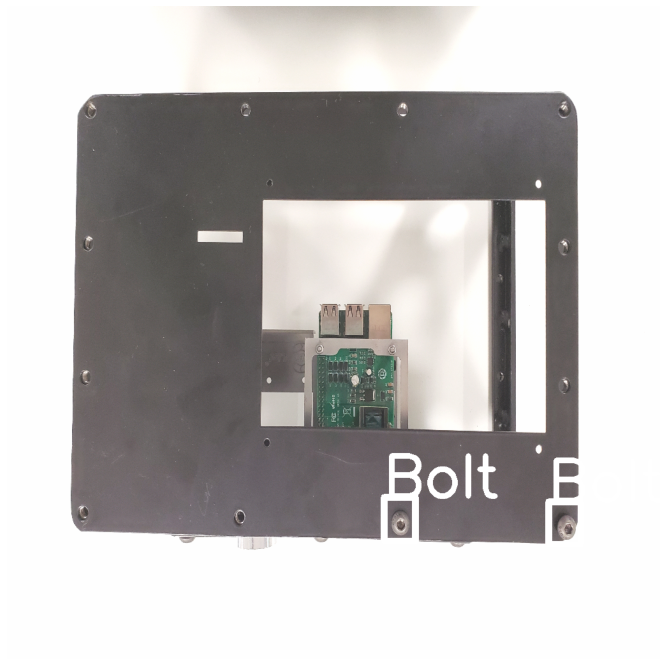

In [10]:
bolt_module.train_dataset().show_data(60)

In [11]:
loader = bolt_module.train_dataloader()

In [12]:
len(loader)

32

In [13]:
images, annotations, targets, bolts = next(iter(loader))

In [14]:
targets

[{'bboxes': tensor([[245.6763, 936.2791, 322.9167, 995.4200]]),
  'labels': tensor([1]),
  'bolts': 1,
  'img_size': [1024, 1024],
  'img_scale': tensor([1.])},
 {'bboxes': tensor([[603.4286,  69.0794, 672.5079, 119.8730]]),
  'labels': tensor([1]),
  'bolts': 1,
  'img_size': [1024, 1024],
  'img_scale': tensor([1.])}]